In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter

# Issues with the data set

## Key information lacking for analysis

#### point of sales: The scraped data shows only prices in USD, presumably, reflecting the prices of flight products in the US market. Showing only one locale limits opportunities for analysis as prices of travel products such as air tickets may differ between point of sales. This is particularly important in the CDG-JFK dataset which is a key transatlantic route connecting the USA and Europe, for which, prices in the European sites for booking.com would help uncover greater insights. 

#### Discounts, offers, promotions: Price reductions in various forms were not included in the dataset. These data categories are often seen in websites of online travel agents to entice bookings, and they can vary between airline operator, date of travel, and seasons. These data, if made available, would enable analysis on promotion patterns of online travel agents and their airline partners. 

## Scraping period

#### Some flight data are scrapped days ago which limit the usability of data for analysis, especially for flight price analysis which changes often. 

#### The chart below show that some data has been scrapped more than 40 days ago which limits credibility of the data source. 

#### Airlines internet booking engines, or price displays by online travel agents change very frequently and can be up to a minute basis. 

#### To improve reliability of the dataset, scheduling the scraping and replacing flights with latest prices may increase quality of the dataset.

In [ ]:
df = pd.read_csv('CDG-JFK.csv')
print(df.head())

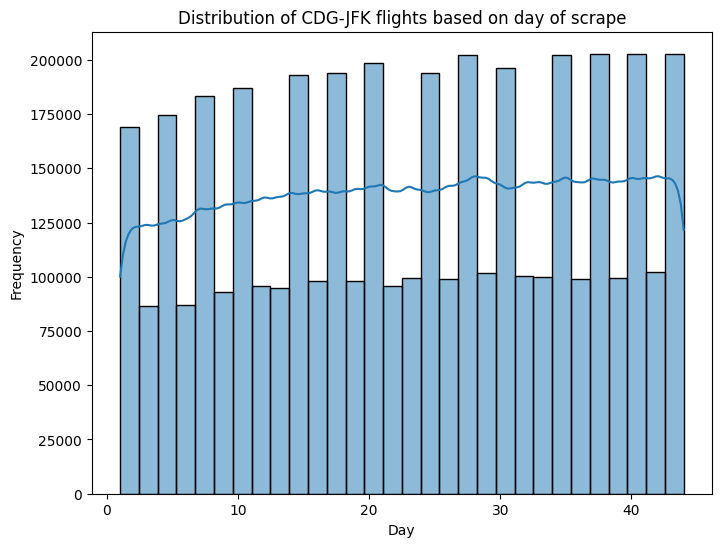

In [9]:

#show the distribution of days from scrape
plt.figure(figsize= (8,6))  #set figure size
sns.histplot(data=df, x='DAYS_FROM_SCRAPE',bins=30, kde=True)
plt.title('Distribution of CDG-JFK flights based on day of scrape')
plt.xlabel('Day') 
plt.ylabel('Frequency')
plt.show()

## Misspelled headers

### As seen below, various column names were mispelled during the scraping process including DEPATURE_TIME and ARRIVIAL_TIME, FLIGHT_OPEATOR.  Without fixes these will often generate errors as the user types in a different word each time.


In [19]:
df = pd.read_csv('CDG-JFK.csv')

#print names of headers in dataset
print(df.columns)


Index(['PK_FLD', 'SCRAPE_DATE', 'TASK_KEY', 'IDENTIFIER', 'TRIP_TYPE', 'PRICE',
       'CURRENCY', 'DEPATURE_CITY', 'ARRIVIAL_CITY', 'DEPATURE_TIME',
       'ARRIVIAL_TIME', 'LAYOVER_1_CITY', 'LEG_1_CABIN',
       'LEG_1_FLIGHT_OPEATOR', 'LEG_1_FLIGHT_NUMBER', 'LEG_1_MINUTE',
       'LEG_2_CABIN', 'LEG_2_FLIGHT_OPEATOR', 'LEG_2_FLIGHT_NUMBER',
       'LEG_2_MINUTE', 'LEG_3_CABIN', 'LEG_3_FLIGHT_OPEATOR',
       'LEG_3_FLIGHT_NUMBER', 'LEG_3_MINUTE', 'LAYOVER_1_MINUTE',
       'LAYOVER_2_MINUTE', 'TOTAL_MINUTE', 'STOPS', 'DAYS_FROM_SCRAPE'],
      dtype='object')


## Outliers

#### The chart below outlines the outliers in prices of JFK/CDG flights, one of which were up to 140,000 USD. 


#### While these prices may not be false, it makes analysis more difficult. For analysing averages and distribution of prices, outliers can be removed from the data during analysis of large volumes of data. 



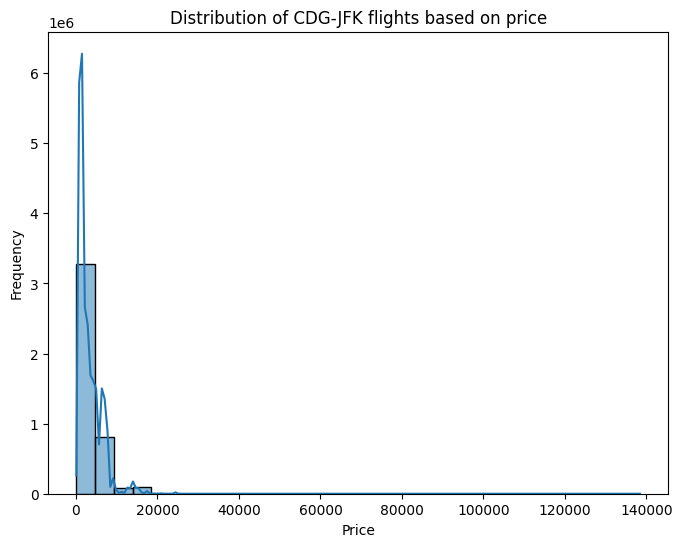

In [20]:

#Show outliers in  price data
plt.figure(figsize= (8,6))  #set figure size
sns.histplot(data=df, x='PRICE',bins=30, kde=True)
plt.title('Distribution of CDG-JFK flights based on price')
plt.xlabel('Price') 
plt.ylabel('Frequency')
plt.show()  


In [ ]:
# Remove outliers from the visualisation
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Inconsistencies

#### The dataset is structured such that for each flight product, the second and third flight has fields including their layover time. 

#### There is,  however, inconsistencies in these fields. For some direct flights, the layover time of the second flight is filled with 0, while the layover time for the third flight is empty. 

#### This makes analysis inefficient, for example, if one were to analyse flight time of the second leg, averages will be skewed unless additional filters were added to the code. 

#### Improvement: Include functions to replace 0 with null values

In [22]:

#count rows of data where LEG_2_MINUTE IS 0 AND LEG_3_MINUTE is empty
print(df[(df['LEG_2_MINUTE'] == 0) & (df['LEG_3_MINUTE'].isna())].shape[0])

#Replacing 0 with null values
df['LEG_2_MINUTE'] = df['LEG_2_MINUTE'].replace(0, np.nan)


159924
